# Sales Data Analysis

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os


In [54]:
# read the file from a directory
os.listdir('E:\Data Science 12 Projects\data_sales')

['all_data.csv',
 'Sales_Analysis_Production.ipynb',
 'Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [55]:
# read all the .csv files from a directory and store it in a list 
files = [file for file in os.listdir('E:\Data Science 12 Projects\data_sales')]
files

# drop the files that are not .csv files
for file in files:
    if not file.endswith('.csv'):
        files.remove(file)
    
files

['all_data.csv',
 'Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [56]:
# erase the all_data file if it exists
for file in files:
    if file == 'all_data.csv':
        files.remove(file)
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [57]:
path = 'E:\Data Science 12 Projects\data_sales'
all_data = pd.DataFrame()

# read all the .csv files and store it in a dataframe
for file in files:
    df = pd.read_csv(path + '/' + file)
    all_data = pd.concat([all_data, df])

# save the dataframe to a csv file
#all_data.to_csv('all_data.csv', index=False)

In [58]:
all_data.shape

(186850, 6)

In [59]:
# save the dataframe to a csv file
all_data.to_csv(path + '/all_data2.csv', index=False)

In [60]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [61]:
# check for missing values
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [62]:
# drop the rows with missing values	
all_data = all_data.dropna(how='all')
all_data.isnull().sum()


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [63]:
all_data.shape

(186305, 6)

# What is the best month for sales? How much was earned that month?

In [64]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [75]:
# get the month from the order date
all_data['Month'] = all_data['Order Date'].str[0:2]
# convert the month column to int type with pandas.to_numeric()
all_data['Month'].unique()

array(['04', '05', 'Or', '08', '09', '12', '01', '02', '03', '07', '06',
       '11', '10'], dtype=object)

In [76]:
# eliminate the rows with 'Or' in the month column
all_data = all_data[all_data['Month'] != 'Or']
all_data['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [77]:
# convert the month column to int type
all_data['Month'] = all_data['Month'].astype('int32')

In [78]:
# check the month column type
all_data['Month'].dtype

dtype('int32')

In [79]:
# check the Quanty Ordered column type
all_data['Quantity Ordered'].dtype

dtype('O')

In [80]:
# convert the Quanty Ordered column to int type
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')

In [81]:
# check the Price Each column type
all_data['Price Each'].dtype

dtype('O')

In [82]:
# convert the Price Each column to float
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

In [83]:
# create a new column for the sales
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [84]:
# import calendar to get the month name
import calendar

In [85]:
# add a Month_Name column with the name of the month
all_data['Month_Name'] = all_data['Month'].apply(lambda x: calendar.month_abbr[x])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Month_Name
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Apr
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Apr
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Apr
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Apr
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Apr


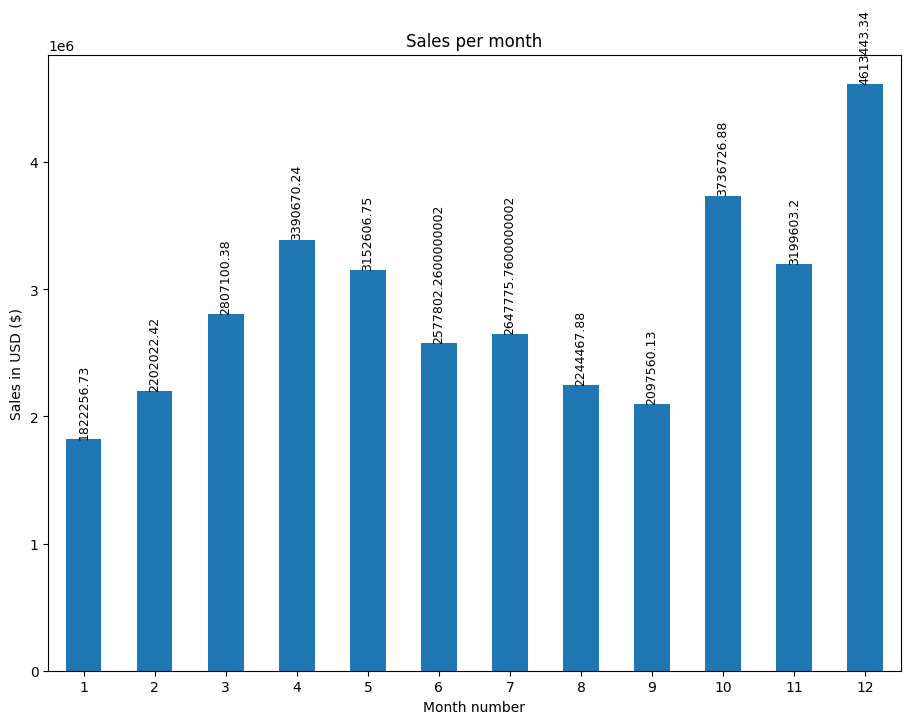

In [96]:
# best mont for sales and how much was earned that month
all_data.groupby('Month').sum()['Sales']

# size of the plot
plt.figure(figsize=(11, 8))
# plot the sales for each month with a bar plot show the sales for each month
all_data.groupby('Month').sum()['Sales'].plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
# show the value of each bar
for index, value in enumerate(all_data.groupby('Month').sum()['Sales']):
    # the value should be shown above the bar in a vertical position
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9, 'rotation':90})

# add a title to the plot
plt.title('Sales per month')

plt.show()

# Which city sold the most product?

In [97]:
# add a city column with the city name from the Purchase Address column
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Month_Name,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Apr,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Apr,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Apr,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles


In [98]:
# check the cities
all_data['City'].unique()

array([' Dallas', ' Boston', ' Los Angeles', ' San Francisco', ' Seattle',
       ' Atlanta', ' New York City', ' Portland', ' Austin'], dtype=object)

In [99]:
# erase the first space in the city name
all_data['City'] = all_data['City'].apply(lambda x: x.strip())
all_data['City'].unique()

array(['Dallas', 'Boston', 'Los Angeles', 'San Francisco', 'Seattle',
       'Atlanta', 'New York City', 'Portland', 'Austin'], dtype=object)

In [101]:
# best city for sales and how much was earned that city
all_data.groupby('City').sum()['Sales'].sort_values(ascending=False)

City
San Francisco    8262203.91
Los Angeles      5452570.80
New York City    4664317.43
Boston           3661642.01
Atlanta          2795498.58
Dallas           2767975.40
Seattle          2747755.48
Portland         2320490.61
Austin           1819581.75
Name: Sales, dtype: float64

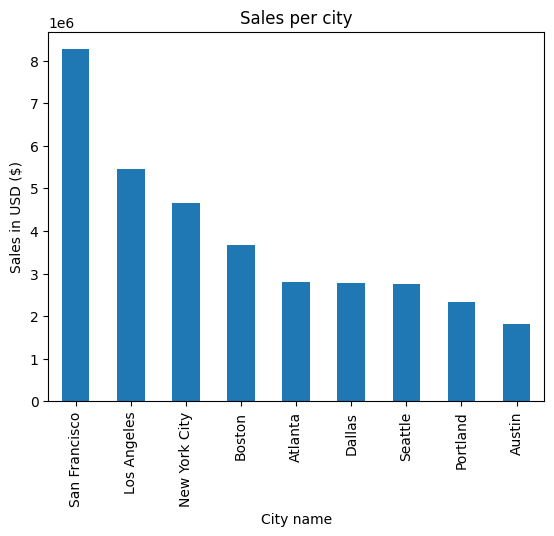

In [103]:
# plot the sales for each city with a bar plot show the sales for each city
all_data.groupby('City').sum()['Sales'].sort_values(ascending=False).plot(kind='bar')
# add a title to the plot
plt.title('Sales per city')
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')
# show the plot
plt.show()

In [106]:
# max orders for each city
all_data.groupby('City')['City'].count().sort_values(ascending=False)


City
San Francisco    44732
Los Angeles      29605
New York City    24876
Boston           19934
Atlanta          14881
Dallas           14820
Seattle          14732
Portland         12465
Austin            9905
Name: City, dtype: int64

In [108]:
import plotly.graph_objects as go
from plotly.offline import iplot


In [109]:
trace = go.Bar(x=all_data.groupby('City')['City'].count().sort_values(ascending=False).index, y=all_data.groupby('City')['City'].count().sort_values(ascending=False).values, name='Orders')
layout = go.Layout(title='Orders per city', xaxis=dict(title='City name'), yaxis=dict(title='Number of orders'))
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

# At what time sales of product purchase is maximun?

In [110]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Month_Name,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Apr,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Apr,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Apr,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles


In [111]:
# add a hour column with the hour from the Order Date column
all_data['Hour'] = all_data['Order Date'].apply(lambda x: x.split(' ')[1].split(':')[0])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Month_Name,City,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Apr,Dallas,08
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Apr,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Apr,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles,09


In [113]:
# check the hour column
all_data['Hour'].unique()

array(['08', '22', '14', '09', '13', '07', '10', '17', '12', '19', '15',
       '20', '18', '00', '11', '23', '21', '04', '16', '05', '02', '01',
       '06', '03'], dtype=object)

In [114]:
# convert the hour column to int type
all_data['Hour'] = all_data['Hour'].astype('int32')

In [116]:
# check the hour column type
all_data['Hour'].dtype

dtype('int32')

In [118]:
# best hour for sales and how much was earned that hour
all_data.groupby('Hour').sum()['Sales']

Hour
0      713721.27
1      460866.88
2      234851.44
3      145757.89
4      162661.01
5      230679.82
6      448113.00
7      744854.12
8     1192348.97
9     1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: Sales, dtype: float64

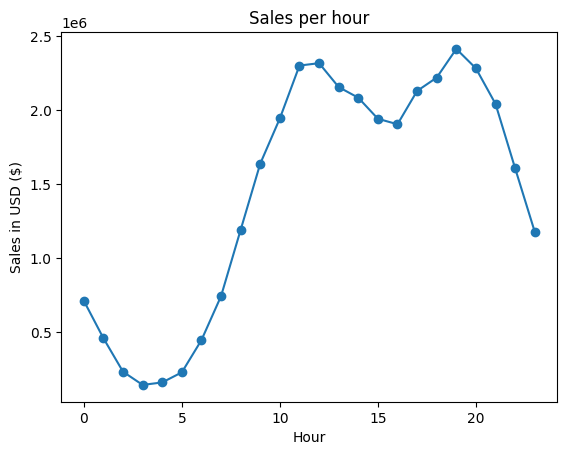

In [120]:
# create a line plot for the sales for each hour
all_data.groupby('Hour').sum()['Sales'].plot(kind='line', marker='o')
# add a title to the plot
plt.title('Sales per hour')
plt.ylabel('Sales in USD ($)')
plt.xlabel('Hour')
# show the plot
plt.show()

In [122]:
# create a line plot for the sales for each hour with a marker using go.Scatter
trace1 = go.Scatter(x=all_data.groupby('Hour').sum()['Sales'].index, y=all_data.groupby('Hour').sum()['Sales'].values, mode='lines+markers', name='Sales')
layout = go.Layout(title='Sales per hour', xaxis=dict(title='Hour'), yaxis=dict(title='Sales in USD ($)'))
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)


# what product sold the most? Why do you think it sold the most?
# What products are most often sold together?

In [123]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Month_Name,City,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Apr,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Apr,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Apr,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles,9


In [124]:
# what products sold the most and why do you think it sold the most?
all_data.groupby('Product').sum()['Quantity Ordered'].sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int32

In [125]:
trace3 = go.Bar(x=all_data.groupby('Product').sum()['Quantity Ordered'].sort_values(ascending=False).index, y=all_data.groupby('Product').sum()['Quantity Ordered'].sort_values(ascending=False).values, name='Quantity Ordered')
layout = go.Layout(title='Quantity Ordered per product', xaxis=dict(title='Product name'), yaxis=dict(title='Quantity Ordered'))
fig = go.Figure(data=[trace3], layout=layout)
iplot(fig)

In [127]:
# get the mean price for each product
all_data.groupby('Product').mean()['Price Each'].sort_values(ascending=True)

Product
AAA Batteries (4-pack)           2.99
AA Batteries (4-pack)            3.84
USB-C Charging Cable            11.95
Wired Headphones                11.99
Lightning Charging Cable        14.95
Bose SoundSport Headphones      99.99
20in Monitor                   109.99
27in FHD Monitor               149.99
Apple Airpods Headphones       150.00
Flatscreen TV                  300.00
34in Ultrawide Monitor         379.99
27in 4K Gaming Monitor         389.99
Vareebadd Phone                400.00
Google Phone                   600.00
LG Washing Machine             600.00
LG Dryer                       600.00
iPhone                         700.00
ThinkPad Laptop                999.99
Macbook Pro Laptop            1700.00
Name: Price Each, dtype: float64

In [128]:
# create variables for the mean price for each product
products = all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity = all_data.groupby('Product')['Quantity Ordered'].sum()
prices = all_data.groupby('Product').mean()['Price Each']

C:\Users\rober\AppData\Local\Temp\ipykernel_11280\2436949098.py:4: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

C:\Users\rober\AppData\Local\Temp\ipykernel_11280\2436949098.py:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



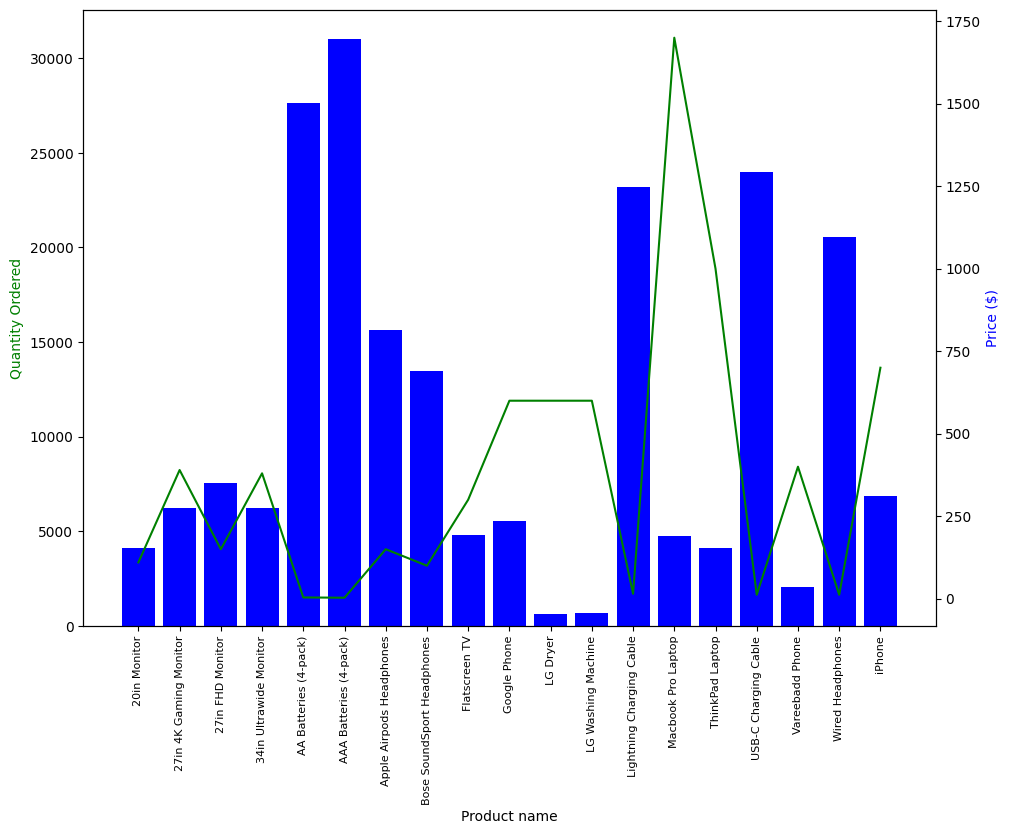

In [134]:
fig, ax1 = plt.subplots(figsize=(11, 8))
ax2 = ax1.twinx()
ax1.bar(products, quantity, color='b')
ax2.plot(products, prices, 'b-', color='g')
ax1.set_xlabel('Product name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.show()

# What product sold togethers most often sold?

In [135]:
# check Order Id
all_data['Order ID'].nunique()

178437

In [136]:
# find the duplicated Order Id
all_data[all_data['Order ID'].duplicated(keep=False)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Month_Name,City,Hour
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Apr,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles,14
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Apr,Los Angeles,19
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Apr,Los Angeles,19
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Apr,Boston,11
...,...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Sep,Atlanta,20
11639,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Sep,Atlanta,0
11640,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Sep,Atlanta,0
11677,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,Sep,San Francisco,13


In [137]:
# create a new column with the products in the same order id
all_data['Grouped'] = all_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Month_Name,City,Hour,Grouped
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Apr,Dallas,8,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Apr,Boston,22,Bose SoundSport Headphones
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Apr,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles,14,"Google Phone,Wired Headphones"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles,9,Wired Headphones


In [138]:
# create a new dataframe with the all_data dataframe with duplicated Order Id
df2 = all_data[all_data['Order ID'].duplicated(keep=False)]
df2.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Month_Name,City,Hour,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Apr,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Apr,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Apr,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Apr,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [139]:
# drop the duplicated Order Id
df2 = df2[['Order ID', 'Grouped']].drop_duplicates()

In [140]:
df2.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [146]:
products_together = df2['Grouped'].value_counts().nlargest(6)

In [147]:
trace4 = go.Bar(x=products_together.index, y=products_together.values, name='Products together')
layout = go.Layout(title='Products together', xaxis=dict(title='Products together'), yaxis=dict(title='Number of orders'))
fig = go.Figure(data=[trace4], layout=layout)
iplot(fig)

In [148]:
trace5 = go.Pie(labels=products_together.index, values=products_together.values, name='Products together')
layout = go.Layout(title='Products together')
fig = go.Figure(data=[trace5], layout=layout)
iplot(fig)